# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


In [3]:
#Viewing the response in order to complete the next step

url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "metric"
city_url = f"{url}{city}&APPID={weather_api_key}&units={units}"
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 62.456,
        "lon": -114.3525
    },
    "dt": 1715192657,
    "id": 6185377,
    "main": {
        "feels_like": 11.98,
        "humidity": 63,
        "pressure": 1008,
        "temp": 12.98,
        "temp_max": 13.01,
        "temp_min": 11.98
    },
    "name": "Yellowknife",
    "sys": {
        "country": "CA",
        "id": 2041581,
        "sunrise": 1715165865,
        "sunset": 1715227800,
        "type": 2
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 4.12
    }
}


In [4]:
#testing to see if the indexes work before running the loop
## DELETE LATER ##
city_lat = city_weather["coord"]["lat"]
city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"]
city_clouds = city_weather["clouds"]["all"]
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"]
city_date = city_weather["dt"]

city_data = ({"City": city, 
                  "Lat": city_lat, 
                  "Lng": city_lng, 
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})
city_data

{'City': 'yellowknife',
 'Lat': 62.456,
 'Lng': -114.3525,
 'Max Temp': 13.01,
 'Humidity': 63,
 'Cloudiness': 20,
 'Wind Speed': 4.12,
 'Country': 'CA',
 'Date': 1715192657}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&APPID={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | general conesa
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | kingisepp
Processing Record 5 of Set 1 | hadibu
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | gillette
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | huanggang
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | sao gabriel da

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,10.41,96,100,1.78,AU,1715192779
1,general conesa,-40.1000,-64.4333,13.79,25,1,9.61,AR,1715192898
2,puerto natales,-51.7236,-72.4875,0.25,100,100,2.06,CL,1715192784
3,kingisepp,59.3733,28.6134,1.33,50,57,2.07,RU,1715192899
4,hadibu,12.6500,54.0333,29.69,72,46,0.54,YE,1715192899


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,10.41,96,100,1.78,AU,1715192779
1,general conesa,-40.1000,-64.4333,13.79,25,1,9.61,AR,1715192898
2,puerto natales,-51.7236,-72.4875,0.25,100,100,2.06,CL,1715192784
3,kingisepp,59.3733,28.6134,1.33,50,57,2.07,RU,1715192899
4,hadibu,12.6500,54.0333,29.69,72,46,0.54,YE,1715192899


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

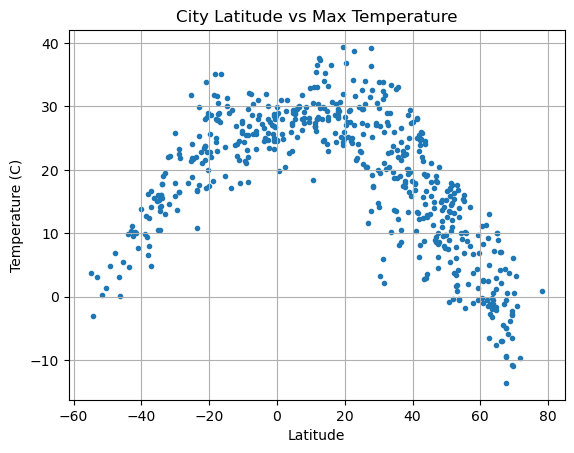

In [10]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat, temp, marker= "." )

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

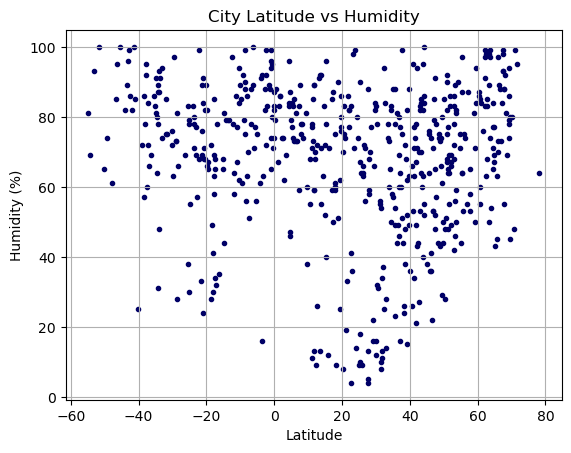

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat, city_data_df["Humidity"],
            marker= ".", color = "#000066")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

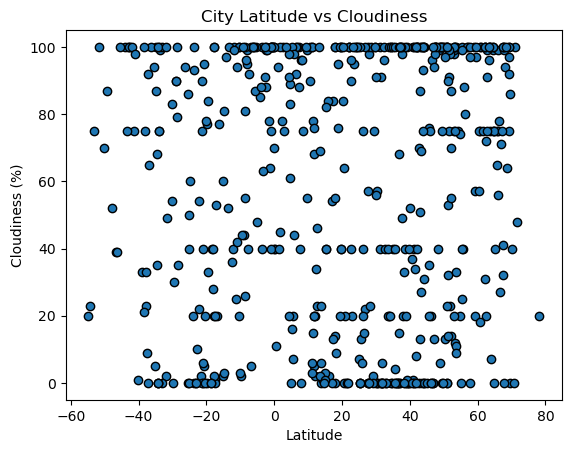

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat, city_data_df["Cloudiness"], edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

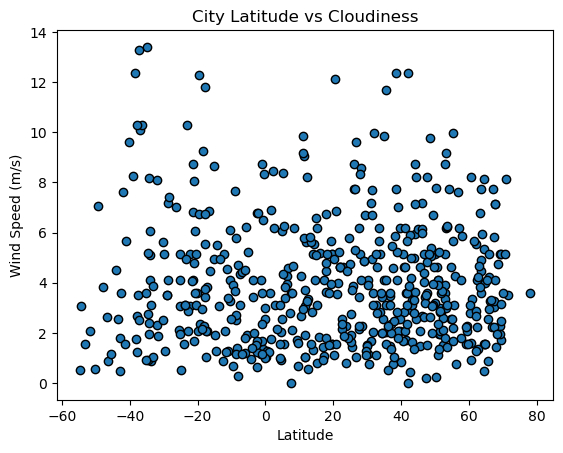

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat, city_data_df["Wind Speed"], edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def linear_regress(x,y, coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regression = intercept + (slope * x)
    line_eq = f"y={round(slope, 2)}x + {round(intercept, 2)}"
    plt.scatter(x,y)
    plt.plot(x, regression, color = "r")
    print(f"The r-value is {round(pearsonr(x,y)[0],2)}")
    plt.annotate(line_eq,xy=coord,fontsize= 15,color="r")


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kingisepp,59.3733,28.6134,1.33,50,57,2.07,RU,1715192899
4,hadibu,12.6500,54.0333,29.69,72,46,0.54,YE,1715192899
6,gillette,44.2911,-105.5022,3.51,100,100,8.75,US,1715192829
7,bethel,41.3712,-73.4140,28.25,63,40,3.60,US,1715192786
8,udachny,66.4167,112.4000,-6.97,89,78,3.27,RU,1715192659


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,10.41,96,100,1.78,AU,1715192779
1,general conesa,-40.1000,-64.4333,13.79,25,1,9.61,AR,1715192898
2,puerto natales,-51.7236,-72.4875,0.25,100,100,2.06,CL,1715192784
5,port-aux-francais,-49.3500,70.2167,4.85,74,87,7.06,TF,1715192778
9,west island,-12.1568,96.8225,26.99,78,40,5.14,CC,1715192787


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.83


Text(0, 0.5, 'Temperature (C)')

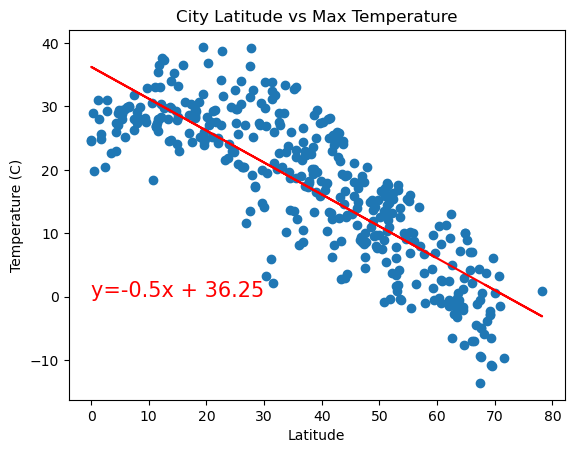

In [32]:
# Linear regression on Northern Hemisphere

#using func 1
n_lat = northern_hemi_df["Lat"]
linear_regress(n_lat, northern_hemi_df["Max Temp"], (0,0))


plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

The r-value is 0.83


Text(0, 0.5, 'Temperature (C)')

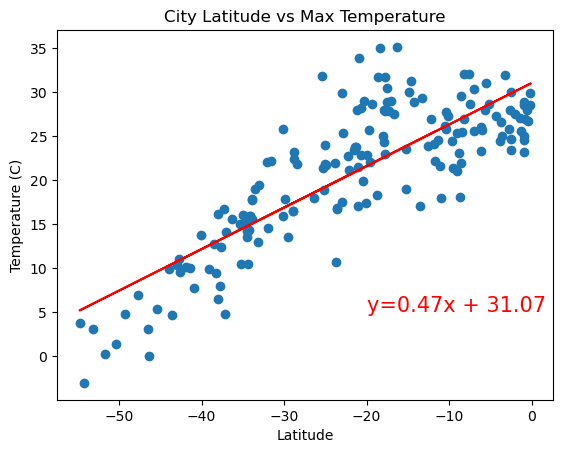

In [33]:
# Linear regression on Southern Hemisphere
s_lat = southern_hemi_df["Lat"]
linear_regress(s_lat, southern_hemi_df["Max Temp"], (-20,5))

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

**Discussion about the linear relationship:**
In the northern hemispehere, there is a strong negative correlation between temperature and latitude. The r-value for this sample is -0.83 which means there is a strong likelihood that temperature is influenced by latitude.
In the southern hemisphere, there is a strong positive correlation between temperature and latitude, albiet less strong than in the northern hemisphere. The r-value for this sample is 0.83 which means there is a strong likelhood that temperature is influenced by latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.14


Text(0, 0.5, 'Humidity (%)')

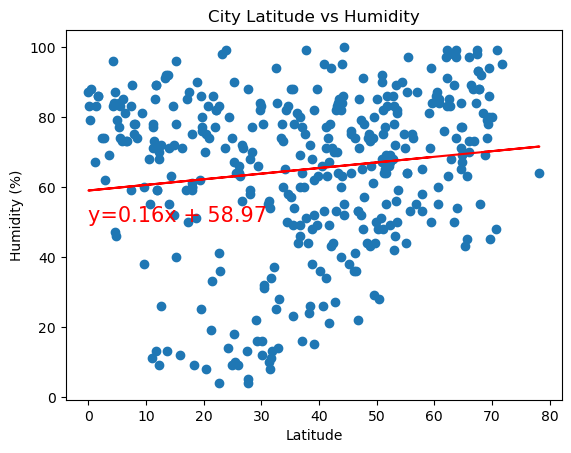

In [35]:
# Northern Hemisphere
linear_regress(n_lat, northern_hemi_df["Humidity"], (0,50))

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

The r-value is -0.04


Text(0, 0.5, 'Humidity (%)')

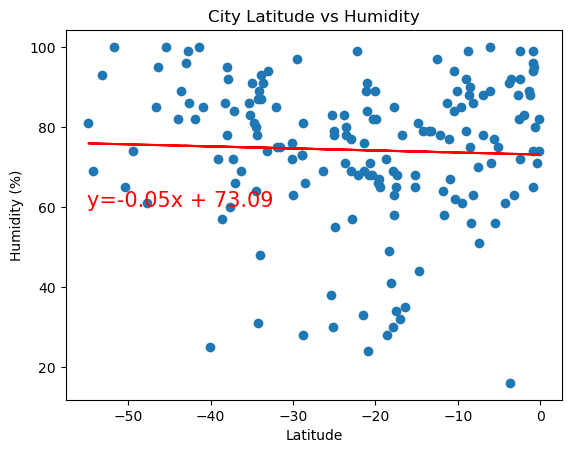

In [37]:
# Southern Hemisphere
s_lat = southern_hemi_df["Lat"]
linear_regress(s_lat, southern_hemi_df["Humidity"], (-55,60))

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

**Discussion about the linear relationship:** 
In both the northern and southern hemisphere there is a weak correlation between humidity and latitude. The datasets yield an r-value of 0.14 and -0.04 respectively which indicates a very weak relationship between the variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.13


Text(0, 0.5, 'Cloudiness (%)')

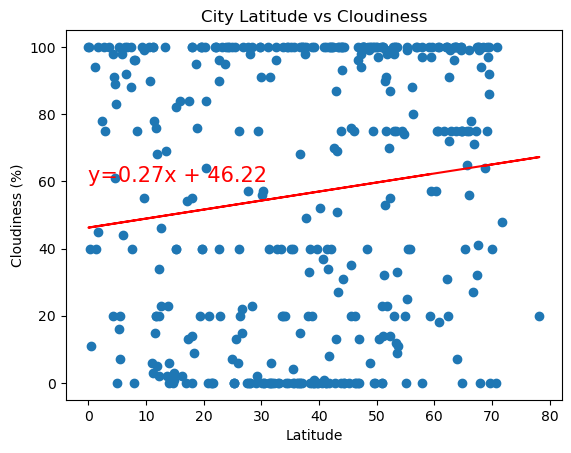

In [38]:
# Northern Hemisphere
linear_regress(n_lat, northern_hemi_df["Cloudiness"],(0, 60))

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

The r-value is 0.13


Text(0, 0.5, 'Cloudiness (%)')

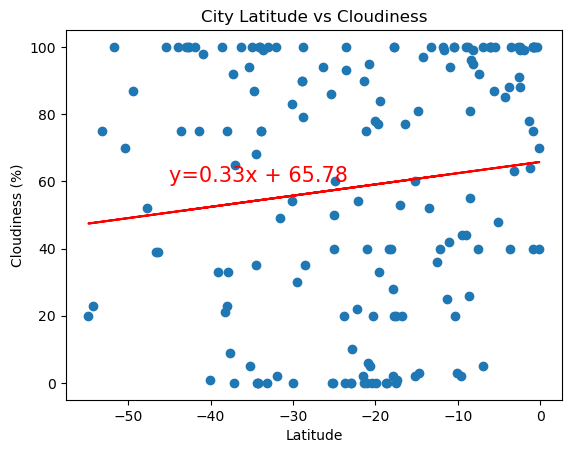

In [40]:
# Southern Hemisphere
s_lat = southern_hemi_df["Lat"]
linear_regress(s_lat, southern_hemi_df["Cloudiness"], (-45, 60))

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

**Discussion about the linear relationship:**
In both the northern and southern hemisphere there is a weak positive correlation between cloudiness and latitude. The datasets both yield an r-value of 0.13 which indicates a weak relationship between the variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.03


Text(0, 0.5, 'Wind Speed (m/s)')

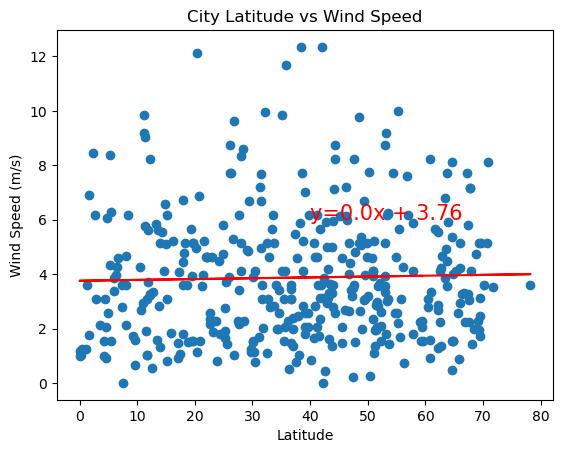

In [41]:
# Northern Hemisphere
linear_regress(n_lat, northern_hemi_df["Wind Speed"], (40, 6))

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

The r-value is -0.09


Text(0, 0.5, 'Wind Speed (m/s)')

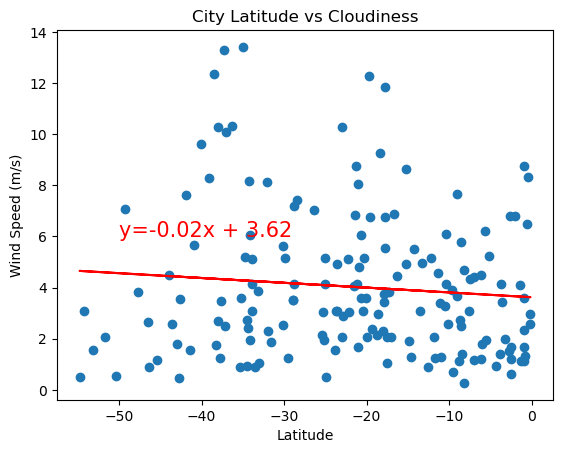

In [42]:
# Southern Hemisphere
s_lat = southern_hemi_df["Lat"]
linear_regress(s_lat, southern_hemi_df["Wind Speed"],(-50, 6))

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

**Discussion about the linear relationship:** 
In both the northern and southern hemisphere there is a weak correlation between cloudiness and latitude. The northern hemisphere having a slope of 0, meaning an increase in an increase in latitude has no impact on the outcome of wind speed. The datasets yield an r-value of 0.03 and 0.09 which indicates a very weak relationship between the variables.